In [ ]:
!pip install scikit-learn

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

In [ ]:
dataset = ['target','id','date','flag','user','text']
df = pd.read_csv("/content/Project_Dataset.csv",header=None, names=dataset)
df = df.drop(df.index[0])
df.head()

,target,id,date,flag,user,text
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
5,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.target.value_counts()

,count
target,
0,2004
4,1043


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 1 to 3047
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  3047 non-null   object
 1   id      3047 non-null   object
 2   date    3047 non-null   object
 3   flag    3047 non-null   object
 4   user    3047 non-null   object
 5   text    3047 non-null   object
dtypes: object(6)
memory usage: 143.0+ KB


In [ ]:
np.sum(df.isnull().any(axis=1))

0

2


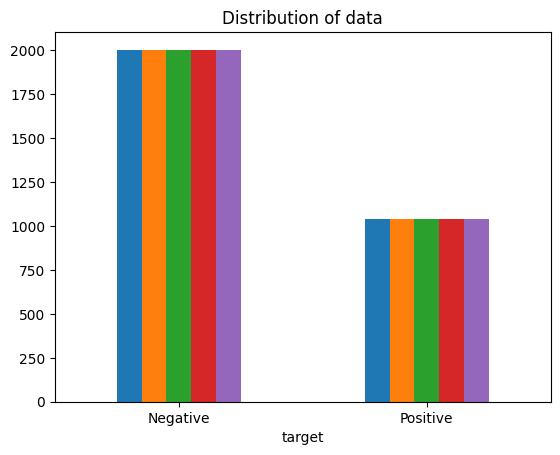

In [ ]:

ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)

print(len(ax.get_xticks()))

ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(df['text']), list(df['target'])

In [ ]:
data=df[['text','target']]

In [ ]:
data['target'].unique()

array(['0', '4'], dtype=object)

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data.loc[:,'text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

,text
1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,upset can't update Facebook texting it... migh...
3,@Kenichan I dived many times ball. Managed sav...
4,whole body feels itchy like fire
5,"@nationwideclass no, it's not behaving all. i'..."


In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data.loc[:,'text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].head()

,text
1,switchfoot httptwitpiccom2y1zl Awww thats bum...
2,upset cant update Facebook texting it might cr...
3,Kenichan I dived many times ball Managed save ...
4,whole body feels itchy like fire
5,nationwideclass no its not behaving all im mad...


In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data.loc[:,'text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].head()

,text
1,switchfoot httptwitpiccom21zl Awww thats bumm...
2,upset cant update Facebook texting it might cr...
3,Kenichan I dived many times ball Managed save ...
4,whole body feels itchy like fire
5,nationwideclass no its not behaving all im mad...


In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data.loc[:, 'text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

,text
1,switchfoot httptwitpiccom21zl A s bummer You ...
2,upset cant update Facebook texting it might cr...
3,Kenichan I dived many times ball Managed save ...
4,whole body feels itchy like fire
5,nationwideclass no its not behaving all im mad...


In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data.loc[:,'text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

,text
1,switchfoot httptwitpiccomzl A s bummer You sh...
2,upset cant update Facebook texting it might cr...
3,Kenichan I dived many times ball Managed save ...
4,whole body feels itchy like fire
5,nationwideclass no its not behaving all im mad...


In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
data.loc[:,'text'] = data['text'].astype(str)
data.loc[:,'text'] = data['text'].apply(tokenizer.tokenize)
data.loc[:,'text'].head()

,text
1,"[switchfoot, httptwitpiccomzl, A, s, bummer, Y..."
2,"[upset, cant, update, Facebook, texting, it, m..."
3,"[Kenichan, I, dived, many, times, ball, Manage..."
4,"[whole, body, feels, itchy, like, fire]"
5,"[nationwideclass, no, its, not, behaving, all,..."


In [ ]:
import nltk
from nltk.tokenize import WordPunctTokenizer

st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text


data.loc[:,'text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

,text
1,"[switchfoot, httptwitpiccomzl, a, s, bummer, y..."
2,"[upset, cant, updat, facebook, text, it, might..."
3,"[kenichan, i, dive, mani, time, ball, manag, s..."
4,"[whole, bodi, feel, itchi, like, fire]"
5,"[nationwideclass, no, it, not, behav, all, im,..."


In [ ]:
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data.loc[:,'text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
1,"[switchfoot, httptwitpiccomzl, a, s, bummer, y..."
2,"[upset, cant, updat, facebook, text, it, might..."
3,"[kenichan, i, dive, mani, time, ball, manag, s..."
4,"[whole, bodi, feel, itchi, like, fire]"
5,"[nationwideclass, no, it, not, behav, all, im,..."


In [ ]:
X=data.text
y=data.target

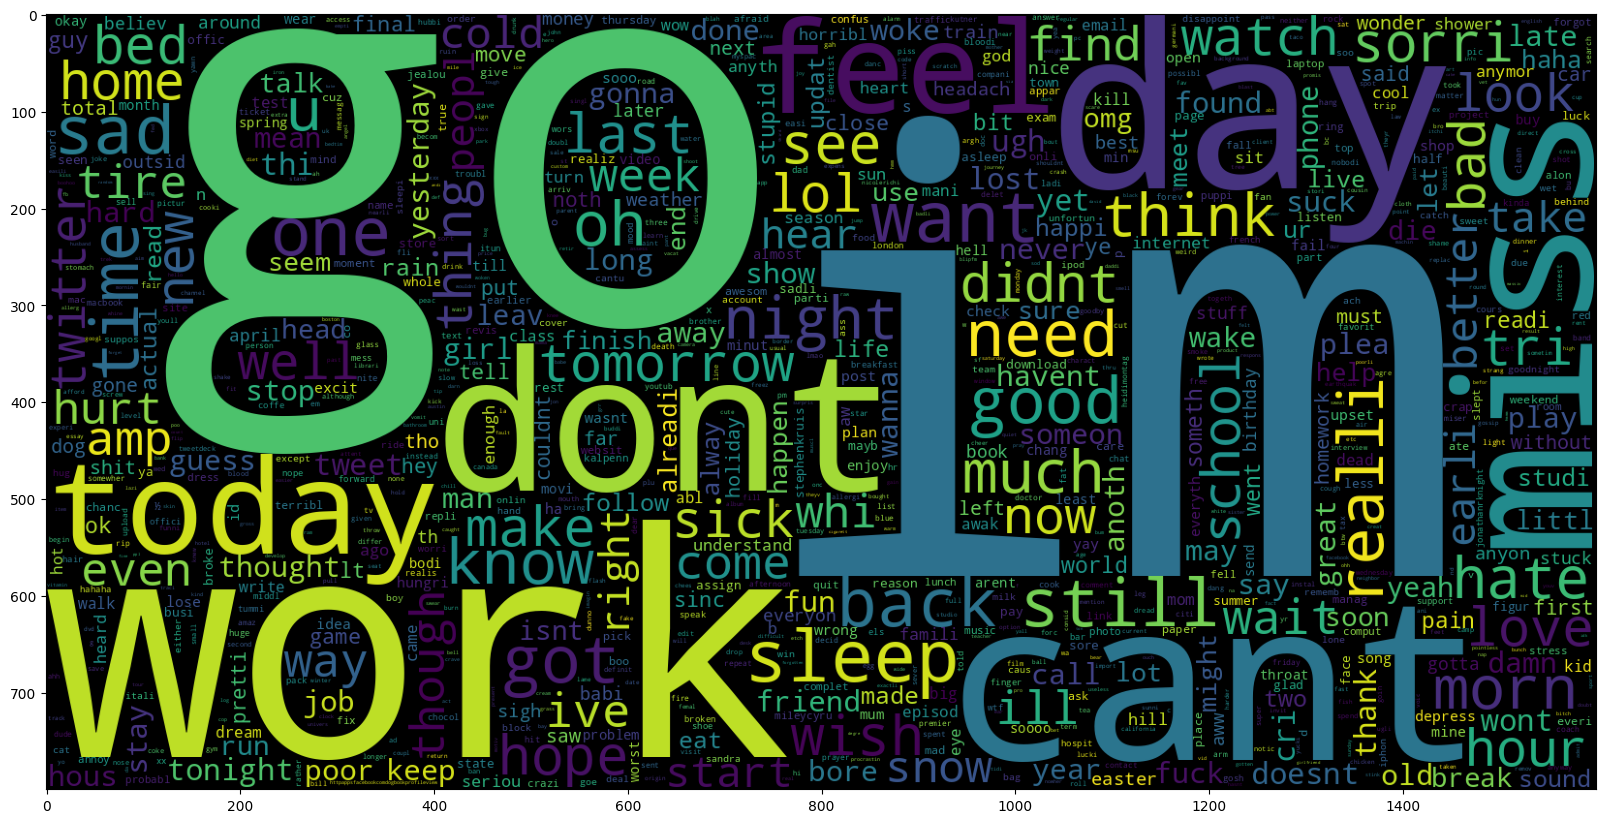

In [ ]:
data_neg = data['text'][:800000].apply(lambda x: " ".join(x))

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

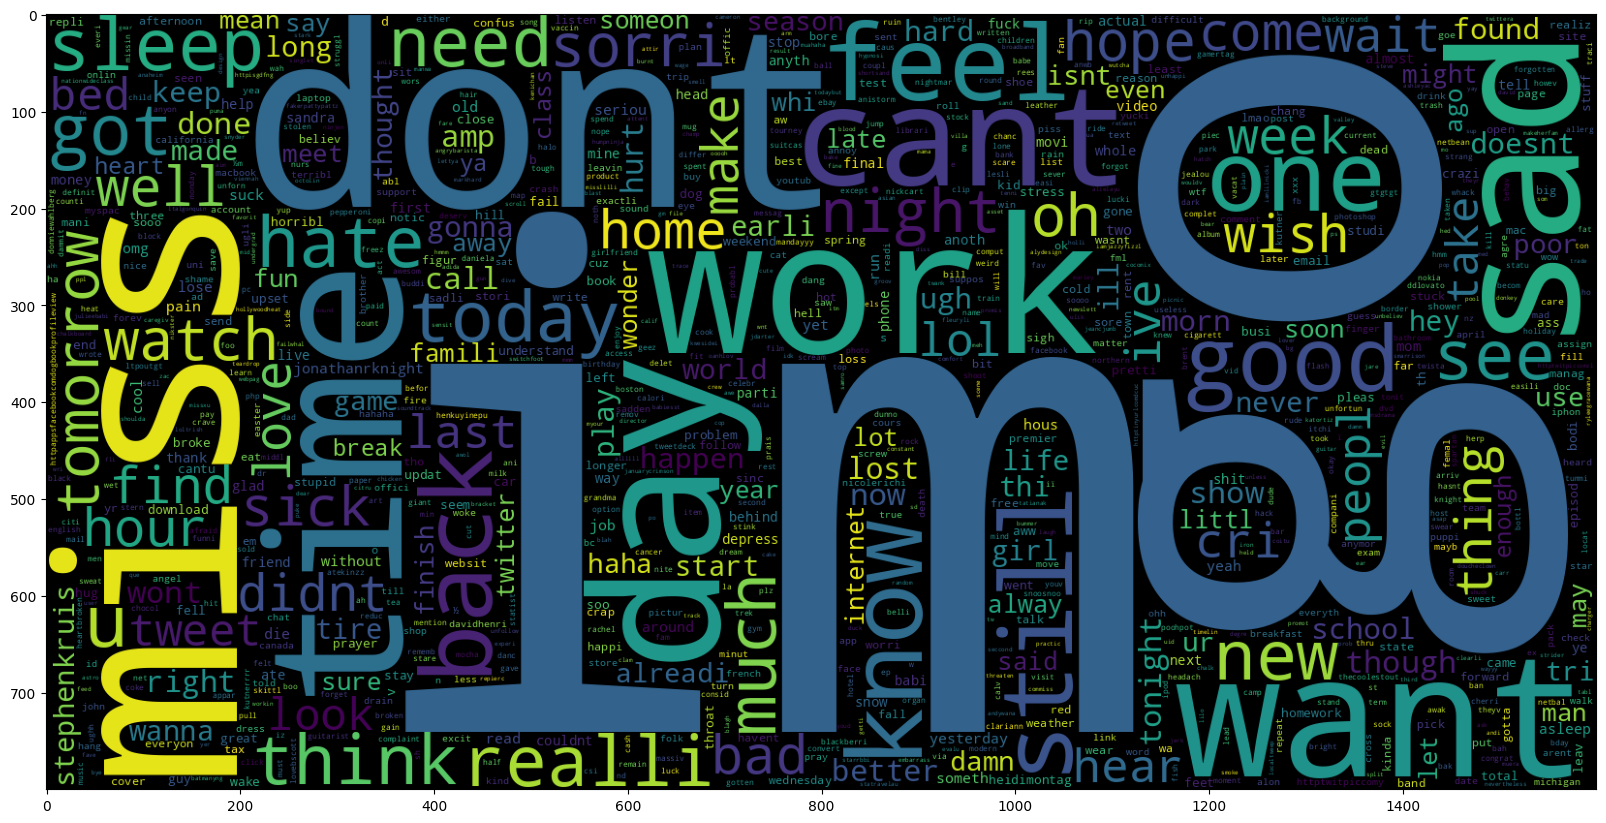

In [ ]:
data_pos = data['text'][:800].apply(lambda x: " ".join(x))

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.05, random_state=26105111)

X_train = X_train.apply(lambda x: " ".join(x))


X_test = X_test.apply(lambda x: " ".join(x))


vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)


X_train_transformed = vectoriser.fit_transform(X_train)


X_test_transformed = vectoriser.transform(X_test)


SVCmodel = LinearSVC()
SVCmodel.fit(X_train_transformed, y_train)


y_pred = SVCmodel.predict(X_test_transformed)

In [ ]:
def blur_negative_comments(text_list, predictions):
    blurred_Word = []
    for i, text in enumerate(text_list):
        if predictions[i] == 0:
            blurred_text = "*" * len(text)
            blurred_words.append(blurred_text)
        else:
            blurred_words.append(text)
    return blurred_words


Blurred_comments = data.loc[:len(y_pred), 'text']



print("Blurred Comments = ")

print(Blurred_comments)



Blurred Comments = 
1      [switchfoot, httptwitpiccomzl, a, s, bummer, y...
2      [upset, cant, updat, facebook, text, it, might...
3      [kenichan, i, dive, mani, time, ball, manag, s...
4                 [whole, bodi, feel, itchi, like, fire]
5      [nationwideclass, no, it, not, behav, all, im,...
                             ...                        
149             [go, sleep, hope, tomorrow, better, day]
150    [rumblepurr, lol, wish, understood, daylight, ...
151                               [onemoreproject, lame]
152               [i, dont, understand, i, realli, dont]
153                                 [hero, isnt, season]
Name: text, Length: 153, dtype: object


In [ ]:
def model_Evaluate(model):

    y_pred = model.predict(X_test_transformed)

    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80       103
           4       0.00      0.00      0.00        50

    accuracy                           0.67       153
   macro avg       0.34      0.50      0.40       153
weighted avg       0.45      0.67      0.54       153



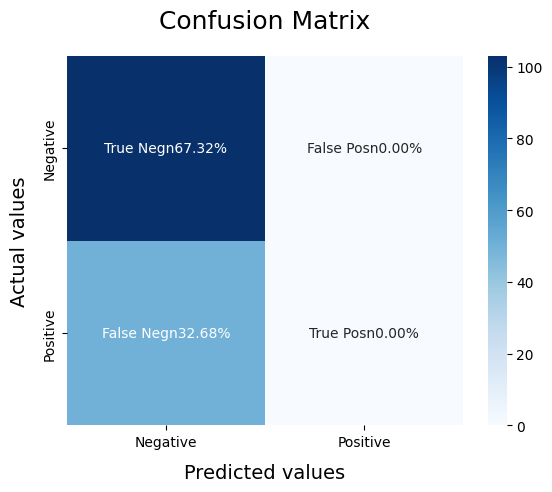

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_transformed, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test_transformed)

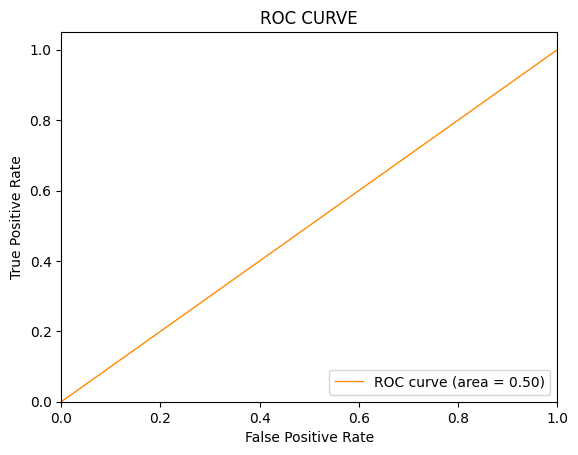

In [ ]:

from sklearn.metrics import roc_curve, auc

y_test = y_test.astype(int).replace(4,1)
y_pred1 = y_pred1.astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def model_Evaluate(model):

    y_pred = model.predict(X_test_transformed)


    y_pred = y_pred.astype(int)


    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)


    print("Shape of confusion matrix:", cf_matrix.shape)


    categories = ['Negative', 'Positive']
    num_categories = cf_matrix.shape[0]


    categories = sorted(list(set(y_test) | set(y_pred)))
    num_categories = len(categories)
    if num_categories == 1:
        categories = ['Negative']
        group_names = ['True Neg', 'False Neg']
    elif num_categories == 2:

        categories = ['Negative', 'Positive']
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    else:

        categories = [str(i) for i in range(num_categories)]
        group_names = [f'True {c}' for c in categories] + \
                      [f'False {c} (pred)' for c in categories if c != categories[0]] * (num_categories - 1)

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]


    labels_shape = cf_matrix.shape
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    if len(labels) < np.prod(labels_shape):
        labels += [''] * (np.prod(labels_shape) - len(labels))
    labels = np.asarray(labels).reshape(labels_shape)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       103
           1       0.00      0.00      0.00        50
           4       0.00      0.00      0.00         0

    accuracy                           0.53       153
   macro avg       0.22      0.26      0.24       153
weighted avg       0.45      0.53      0.48       153

Shape of confusion matrix: (3, 3)


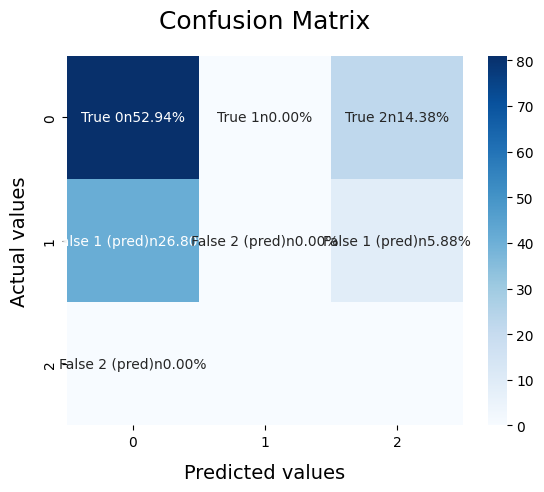

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_transformed, y_train)
model_Evaluate(SVCmodel)
y_pred2= SVCmodel.predict(X_test_transformed)

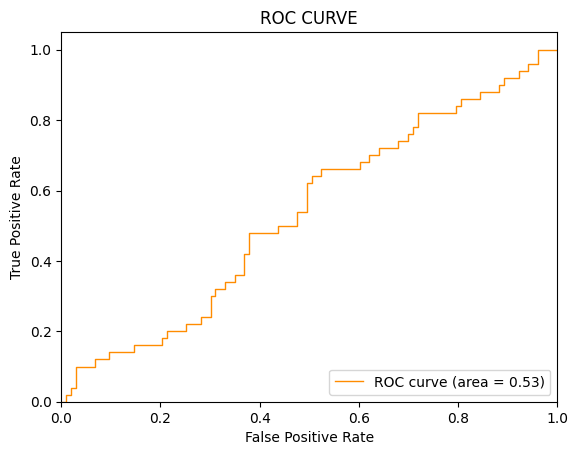

In [ ]:
y_pred2 = SVCmodel.decision_function(X_test_transformed)

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       103
           1       0.00      0.00      0.00        50
           4       0.00      0.00      0.00         0

    accuracy                           0.63       153
   macro avg       0.23      0.31      0.26       153
weighted avg       0.46      0.63      0.53       153

Shape of confusion matrix: (3, 3)


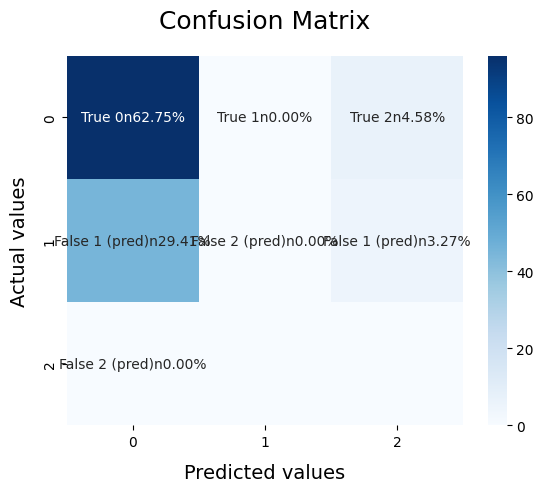

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_transformed, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test_transformed)

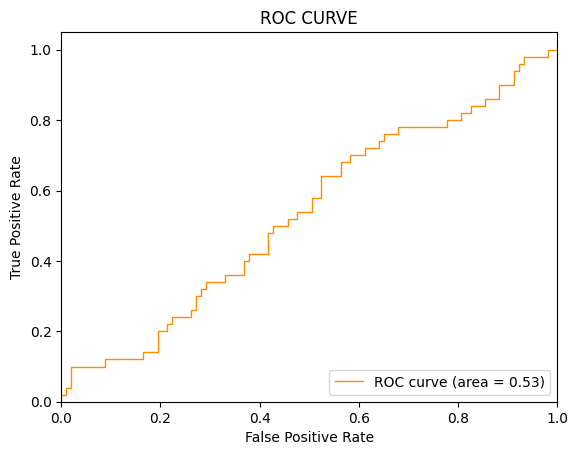

In [ ]:
y_pred3 = LRmodel.predict_proba(X_test_transformed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, SVCmodel.predict(X_test_transformed).astype(int)))

pred = SVCmodel.predict(X_test_transformed)

f1_score(y_test, pred.astype(int), average='weighted')

0.5294117647058824


0.48470588235294115